In [183]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset

In [184]:
dataset_url: str = "https://raw.githubusercontent.com/kalyaniuniversity/mgx-datasets/master/DLBCL/datasets/dlbcl-fl.csv"

df = pd.read_csv(dataset_url)

In [185]:
df.shape

(77, 7071)

In [186]:
df.head()

,A28102,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,...,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,class
0,-1,-45,176,97,-57,233,265,945,56,819,...,1036,-161,1523,-72,897,366,3,76,-28,DLBCL
1,25,-17,531,353,122,155,209,1688,42,639,...,4254,-75,6056,-68,737,81,-4,41,-45,DLBCL
2,73,91,257,80,614,507,760,2252,196,863,...,1934,-129,2901,-9,946,450,38,164,-62,DLBCL
3,267,41,202,138,198,355,245,1469,170,384,...,2469,93,2465,-119,339,321,-63,73,-13,DLBCL
4,16,24,187,39,145,254,571,930,-11,439,...,608,-39,1667,-87,721,213,15,155,-26,DLBCL


### Summary of dataset

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Columns: 7071 entries, A28102 to class
dtypes: int64(7070), object(1)
memory usage: 4.2+ MB


In [188]:
df['class'].value_counts()

DLBCL    58
FL       19
Name: class, dtype: int64

### Missing value in variables

In [189]:
df.isnull().sum()

A28102         0
AB000114_at    0
AB000115_at    0
AB000220_at    0
AB000409_at    0
              ..
Z17240_at      0
L49218_f_at    0
M71243_f_at    0
Z78285_f_at    0
class          0
Length: 7071, dtype: int64

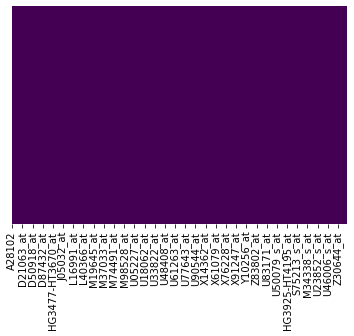

In [190]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Feature Vector and Target variable

In [209]:
X = df.drop(['class'], axis=1)

y = df['class']

In [210]:
X.shape, y.shape

((77, 7070), (77,))

## Split the dataset into train and test

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=234)

In [212]:
X_train.shape, X_test.shape

((53, 7070), (24, 7070))

## Decision Tree Classifier with criterion gini index

In [213]:
clf_model_gini = DecisionTreeClassifier(criterion="gini",
                                        max_depth=3,
                                        min_samples_leaf=10,
                                        random_state=10)

In [214]:
clf_model_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=10)

In [215]:
y_predicted = clf_model_gini.predict(X_test)

In [216]:
accuracy = accuracy_score(y_test, y_predicted)
print(f"Model accuary with gini index is: {accuracy*100:0.2f} %")
# print(clf_model_gini.score(X_test, y_test))

Model accuary with gini index is: 83.33 %


In [217]:
confusion_matrix(y_test, y_predicted)

array([[17,  3],
       [ 1,  3]])

[Text(0.4, 0.8333333333333334, 'D55716_at <= 859.5\ngini = 0.406\nsamples = 53\nvalue = [38, 15]\nclass = DLBCL'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]\nclass = FL'),
 Text(0.6, 0.5, 'U50928_at <= 84.0\ngini = 0.095\nsamples = 40\nvalue = [38, 2]\nclass = DLBCL'),
 Text(0.4, 0.16666666666666666, 'gini = 0.32\nsamples = 10\nvalue = [8, 2]\nclass = DLBCL'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 30\nvalue = [30, 0]\nclass = DLBCL')]

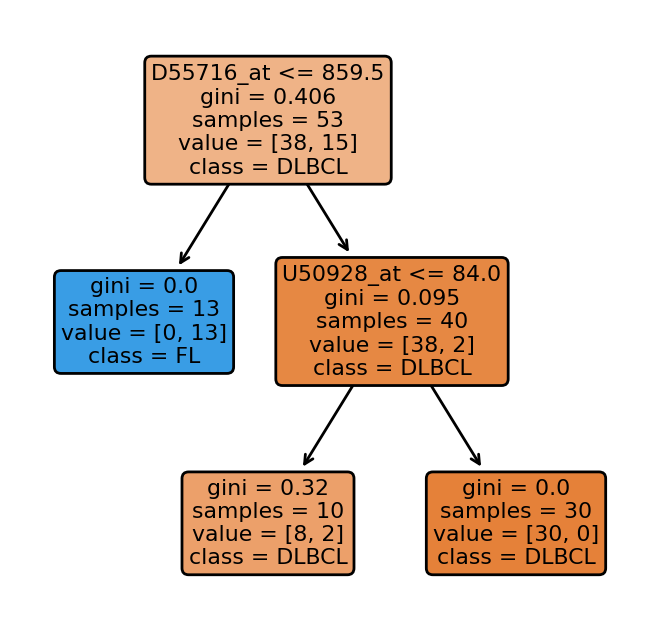

In [218]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=200)
tree.plot_tree(
    clf_model_gini,
    feature_names = X.keys(), 
    class_names = ['DLBCL', 'FL'], 
    filled = True, 
    rounded=True
)

# Performing dimensionality reduction (PCA) to get better accuracy

In [219]:
from sklearn.decomposition import PCA

In [220]:
n_components = 16

pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)

X_train_pca = pca.transform(X_train)

In [221]:
clf_model_gini.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=10)

In [222]:
accuary = clf_model_gini.score(pca.transform(X_test), y_test)

print(f"Model accuary is now: {accuary*100:0.2f} %")

Model accuary is now: 91.67 %
